In [86]:
# Load Pkgs
import spacy
from spacy import displacy
import pandas as pd
import numpy as np
import pickle
import string
import matplotlib.pyplot as plt
import contractions
from collections import Counter
from spacy import displacy

In [3]:
# Load Our Model & NLP(TALN) Object
nlp_fr = spacy.load('fr_core_news_sm')
nlp_de = spacy.load('de_core_news_sm')
nlp_en = spacy.load('en_core_web_sm')

In [4]:
df = pd.read_excel('../Data/data/EU Health Claims - EN, DE, PL, FR, RO, HU.xlsx')
df.head()

,English,Unnamed: 1,French,Unnamed: 3,German,Unnamed: 5,Polish,Unnamed: 7,Romanian,Unnamed: 9,Hungarian,Unnamed: 11,EC Regulation,Article of EC 1924/2006
0,Nutrient,Claim,Nutrient,Claim,Nutrient,Claim,Nutrient,Claim,Nutrient,Claim,Nutrient,Claim,NaN,NaN
1,Activated charcoal,Activated charcoal contributes to reducing exc...,Charbon actif,Le charbon actif contribue à réduire l’excès d...,Aktivkohle,Aktivkohle trägt zur Verringerung übermäßiger ...,Węgiel aktywowany,Węgiel aktywowany pomaga zmniejszyć występując...,Cărbune activ,Cărbunele activ contribuie la reducerea flatul...,Aktív szén,Az aktív szén részt vesz az étkezést követő tú...,432/2012,Article 13(1): function health claim
2,Alpha-cyclodextrin,Consumption of alpha-cyclodextrin as part of a...,Alpha-cyclodextrine,La consommation d’alpha-cyclodextrine à l’occa...,Alpha-Cyclodextrin,Der Verzehr von Alpha-Cyclodextrin als Bestand...,Alfa-cyklodekstryna,Spożycie alfa-cyklodekstryny w ramach posiłku ...,Alfa-ciclodextrină,Consumul de alfa-ciclodextrină în cadrul unei ...,Alfa-ciklodextrin,Keményítőtartalmú étkezés részeként az alfa-ci...,536/2013,Article 13(1): function health claim
3,Alpha-linolenic acid & linoleic acid,Essential fatty acids are needed for normal gr...,Acide Alpha-linolénique et acide linoléique,Les acides gras essentiels sont nécessaires à ...,Alpha-Linolensäure und Linolsäure,Essenzielle Fettsäuren werden für ein gesundes...,Kwas alfa-linolenowy i kwas linolowy,Niezbędne nienasycone kwasy tłuszczowe są potr...,Acid alfa-linolenic & acid linoleic,Acizii grași esențiali sunt necesari pentru cr...,Alfa-linolénsav és linolsav,Az esszenciális zsírsavakra szükség van a gyer...,983/2009,Article 14(1)(b): health claim referring to ch...
4,Alpha-linolenic acid (ALA),ALA contributes to the maintenance of normal b...,Acide alpha-linolénique (ALA),L’acide alpha-linolénique (ALA) contribue au m...,Alpha-Linolensäure (ALA),ALA trägt zur Aufrechterhaltung eines normalen...,Kwas alfa-linolenowy (ALA),Kwas alfa-linolenowy (ALA) pomaga w utrzymaniu...,Acid alfa-linolenic (ALA),AAL contribuie la menținerea concentrațiilor n...,Alfa-linolénsav (ALA),Az ALA hozzájárul a vér normál koleszterinszin...,432/2012,Article 13(1): function health claim


In [5]:
df['Unnamed: 1'][240]

'Water contributes to the maintenance of normal regulation of the body’s temperature'

In [6]:
docx = nlp_fr(df['Unnamed: 3'][240])
for token in docx:
    print(token.text,token.pos_)

L’ PROPN
eau NOUN
contribue VERB
au ADP
maintien NOUN
de ADP
la DET
régulation NOUN
normale ADJ
de ADP
la DET
température NOUN
du ADP
corps NOUN


In [35]:
df['Unnamed: 3'][240].lower()

'l’eau contribue au maintien de la régulation normale de la température du corps'

In [32]:
for token in docx :
        token.lemma_ = token.lemma_.lower()
docx

Water contributes to the maintenance of normal regulation of the body’s temperature

In [19]:
fr_df = pd.DataFrame(columns=['Claims'])
en_df = pd.DataFrame(columns=['Claims'])
de_df = pd.DataFrame(columns=['Claims'])


In [20]:
en_df['Claims'] = df['Unnamed: 1'][1:]
fr_df['Claims'] = df['Unnamed: 3'][1:]
de_df['Claims'] = df['Unnamed: 5'][1:]

### Tokenization

In [33]:
en_df['tokenized'] = en_df['Claims'].apply(lambda x: [token.text for token in nlp_en(x)]) 
fr_df['tokenized'] = fr_df['Claims'].apply(lambda x: [token.text for token in nlp_fr(x)]) 
de_df['tokenized'] = de_df['Claims'].apply(lambda x: [token.text for token in nlp_de(x)]) 

In [47]:
fr_df

,Claims,tokenized,lower,no_punc
1,Le charbon actif contribue à réduire l’excès d...,"[Le, charbon, actif, contribue, à, réduire, l’...","[le, charbon, actif, contribue, à, réduire, l’...","[le, charbon, actif, contribue, à, réduire, l’..."
2,La consommation d’alpha-cyclodextrine à l’occa...,"[La, consommation, d’, alpha, -, cyclodextrine...","[la, consommation, d’, alpha, -, cyclodextrine...","[la, consommation, d’, alpha, cyclodextrine, à..."
3,Les acides gras essentiels sont nécessaires à ...,"[Les, acides, gras, essentiels, sont, nécessai...","[les, acides, gras, essentiels, sont, nécessai...","[les, acides, gras, essentiels, sont, nécessai..."
4,L’acide alpha-linolénique (ALA) contribue au m...,"[L’, acide, alpha, -, linolénique, (, ALA, ), ...","[l’, acide, alpha, -, linolénique, (, ala, ), ...","[l’, acide, alpha, linolénique, ala, contribue..."
5,La consommation d’arabinoxylane à l’occasion d...,"[La, consommation, d’, arabinoxylane, à, l’, o...","[la, consommation, d’, arabinoxylane, à, l’, o...","[la, consommation, d’, arabinoxylane, à, l’, o..."
...,...,...,...,...
256,Le zinc contribue au maintien d’un taux normal...,"[Le, zinc, contribue, au, maintien, d’, un, ta...","[le, zinc, contribue, au, maintien, d’, un, ta...","[le, zinc, contribue, au, maintien, d’, un, ta..."
257,Le zinc contribue au maintien d’une vision nor...,"[Le, zinc, contribue, au, maintien, d’, une, v...","[le, zinc, contribue, au, maintien, d’, une, v...","[le, zinc, contribue, au, maintien, d’, une, v..."
258,Le zinc contribue au fonctionnement normal du ...,"[Le, zinc, contribue, au, fonctionnement, norm...","[le, zinc, contribue, au, fonctionnement, norm...","[le, zinc, contribue, au, fonctionnement, norm..."
259,Le zinc contribue à protéger les cellules cont...,"[Le, zinc, contribue, à, protéger, les, cellul...","[le, zinc, contribue, à, protéger, les, cellul...","[le, zinc, contribue, à, protéger, les, cellul..."


### Converting all Characters to Lowercase

In [34]:
en_df['lower'] = en_df['tokenized'].apply(lambda x :[word.lower() for word in x])
fr_df['lower'] = fr_df['tokenized'].apply(lambda x :[word.lower() for word in x])
de_df['lower'] = de_df['tokenized'].apply(lambda x :[word.lower() for word in x])


In [35]:
fr_df

,Claims,tokenized,lower
1,Le charbon actif contribue à réduire l’excès d...,"[Le, charbon, actif, contribue, à, réduire, l’...","[le, charbon, actif, contribue, à, réduire, l’..."
2,La consommation d’alpha-cyclodextrine à l’occa...,"[La, consommation, d’, alpha, -, cyclodextrine...","[la, consommation, d’, alpha, -, cyclodextrine..."
3,Les acides gras essentiels sont nécessaires à ...,"[Les, acides, gras, essentiels, sont, nécessai...","[les, acides, gras, essentiels, sont, nécessai..."
4,L’acide alpha-linolénique (ALA) contribue au m...,"[L’, acide, alpha, -, linolénique, (, ALA, ), ...","[l’, acide, alpha, -, linolénique, (, ala, ), ..."
5,La consommation d’arabinoxylane à l’occasion d...,"[La, consommation, d’, arabinoxylane, à, l’, o...","[la, consommation, d’, arabinoxylane, à, l’, o..."
...,...,...,...
256,Le zinc contribue au maintien d’un taux normal...,"[Le, zinc, contribue, au, maintien, d’, un, ta...","[le, zinc, contribue, au, maintien, d’, un, ta..."
257,Le zinc contribue au maintien d’une vision nor...,"[Le, zinc, contribue, au, maintien, d’, une, v...","[le, zinc, contribue, au, maintien, d’, une, v..."
258,Le zinc contribue au fonctionnement normal du ...,"[Le, zinc, contribue, au, fonctionnement, norm...","[le, zinc, contribue, au, fonctionnement, norm..."
259,Le zinc contribue à protéger les cellules cont...,"[Le, zinc, contribue, à, protéger, les, cellul...","[le, zinc, contribue, à, protéger, les, cellul..."


### Removing Punctuations

In [41]:
punc = string.punctuation
en_df['no_punc'] = en_df['lower'].apply(lambda x: [word for word in x if word not in punc])
fr_df['no_punc'] = fr_df['lower'].apply(lambda x: [word for word in x if word not in punc])
de_df['no_punc'] = de_df['lower'].apply(lambda x: [word for word in x if word not in punc])

In [51]:
fr_df

,Claims,tokenized,lower,no_punc
1,Le charbon actif contribue à réduire l’excès d...,"[Le, charbon, actif, contribue, à, réduire, l’...","[le, charbon, actif, contribue, à, réduire, l’...","[le, charbon, actif, contribue, à, réduire, l’..."
2,La consommation d’alpha-cyclodextrine à l’occa...,"[La, consommation, d’, alpha, -, cyclodextrine...","[la, consommation, d’, alpha, -, cyclodextrine...","[la, consommation, d’, alpha, cyclodextrine, à..."
3,Les acides gras essentiels sont nécessaires à ...,"[Les, acides, gras, essentiels, sont, nécessai...","[les, acides, gras, essentiels, sont, nécessai...","[les, acides, gras, essentiels, sont, nécessai..."
4,L’acide alpha-linolénique (ALA) contribue au m...,"[L’, acide, alpha, -, linolénique, (, ALA, ), ...","[l’, acide, alpha, -, linolénique, (, ala, ), ...","[l’, acide, alpha, linolénique, ala, contribue..."
5,La consommation d’arabinoxylane à l’occasion d...,"[La, consommation, d’, arabinoxylane, à, l’, o...","[la, consommation, d’, arabinoxylane, à, l’, o...","[la, consommation, d’, arabinoxylane, à, l’, o..."
...,...,...,...,...
256,Le zinc contribue au maintien d’un taux normal...,"[Le, zinc, contribue, au, maintien, d’, un, ta...","[le, zinc, contribue, au, maintien, d’, un, ta...","[le, zinc, contribue, au, maintien, d’, un, ta..."
257,Le zinc contribue au maintien d’une vision nor...,"[Le, zinc, contribue, au, maintien, d’, une, v...","[le, zinc, contribue, au, maintien, d’, une, v...","[le, zinc, contribue, au, maintien, d’, une, v..."
258,Le zinc contribue au fonctionnement normal du ...,"[Le, zinc, contribue, au, fonctionnement, norm...","[le, zinc, contribue, au, fonctionnement, norm...","[le, zinc, contribue, au, fonctionnement, norm..."
259,Le zinc contribue à protéger les cellules cont...,"[Le, zinc, contribue, à, protéger, les, cellul...","[le, zinc, contribue, à, protéger, les, cellul...","[le, zinc, contribue, à, protéger, les, cellul..."


### Removing Stopwords

In [52]:
spacy_stopwords_en = spacy.lang.en.stop_words.STOP_WORDS
spacy_stopwords_fr = spacy.lang.fr.stop_words.STOP_WORDS
spacy_stopwords_de = spacy.lang.de.stop_words.STOP_WORDS

In [54]:
en_df['stopwords_removed'] = en_df['no_punc'].apply(lambda x: [word for word in x if word not in spacy_stopwords_en])
fr_df['stopwords_removed'] = fr_df['no_punc'].apply(lambda x: [word for word in x if word not in spacy_stopwords_fr])
de_df['stopwords_removed'] = de_df['no_punc'].apply(lambda x: [word for word in x if word not in spacy_stopwords_de])


In [55]:
fr_df

,Claims,tokenized,lower,no_punc,stopwords_removed
1,Le charbon actif contribue à réduire l’excès d...,"[Le, charbon, actif, contribue, à, réduire, l’...","[le, charbon, actif, contribue, à, réduire, l’...","[le, charbon, actif, contribue, à, réduire, l’...","[charbon, actif, contribue, réduire, excès, fl..."
2,La consommation d’alpha-cyclodextrine à l’occa...,"[La, consommation, d’, alpha, -, cyclodextrine...","[la, consommation, d’, alpha, -, cyclodextrine...","[la, consommation, d’, alpha, cyclodextrine, à...","[consommation, alpha, cyclodextrine, occasion,..."
3,Les acides gras essentiels sont nécessaires à ...,"[Les, acides, gras, essentiels, sont, nécessai...","[les, acides, gras, essentiels, sont, nécessai...","[les, acides, gras, essentiels, sont, nécessai...","[acides, gras, essentiels, nécessaires, croiss..."
4,L’acide alpha-linolénique (ALA) contribue au m...,"[L’, acide, alpha, -, linolénique, (, ALA, ), ...","[l’, acide, alpha, -, linolénique, (, ala, ), ...","[l’, acide, alpha, linolénique, ala, contribue...","[acide, alpha, linolénique, ala, contribue, ma..."
5,La consommation d’arabinoxylane à l’occasion d...,"[La, consommation, d’, arabinoxylane, à, l’, o...","[la, consommation, d’, arabinoxylane, à, l’, o...","[la, consommation, d’, arabinoxylane, à, l’, o...","[consommation, arabinoxylane, occasion, repas,..."
...,...,...,...,...,...
256,Le zinc contribue au maintien d’un taux normal...,"[Le, zinc, contribue, au, maintien, d’, un, ta...","[le, zinc, contribue, au, maintien, d’, un, ta...","[le, zinc, contribue, au, maintien, d’, un, ta...","[zinc, contribue, maintien, taux, normal, test..."
257,Le zinc contribue au maintien d’une vision nor...,"[Le, zinc, contribue, au, maintien, d’, une, v...","[le, zinc, contribue, au, maintien, d’, une, v...","[le, zinc, contribue, au, maintien, d’, une, v...","[zinc, contribue, maintien, vision, normale]"
258,Le zinc contribue au fonctionnement normal du ...,"[Le, zinc, contribue, au, fonctionnement, norm...","[le, zinc, contribue, au, fonctionnement, norm...","[le, zinc, contribue, au, fonctionnement, norm...","[zinc, contribue, fonctionnement, normal, syst..."
259,Le zinc contribue à protéger les cellules cont...,"[Le, zinc, contribue, à, protéger, les, cellul...","[le, zinc, contribue, à, protéger, les, cellul...","[le, zinc, contribue, à, protéger, les, cellul...","[zinc, contribue, protéger, cellules, contre, ..."


### Stemming and Lemmatization

In [56]:
# Convert to string
en_df['stopwords_removed_str'] = [' '.join(map(str, l)) for l in en_df['stopwords_removed']] 
fr_df['stopwords_removed_str'] = [' '.join(map(str, l)) for l in fr_df['stopwords_removed']] 
de_df['stopwords_removed_str'] = [' '.join(map(str, l)) for l in de_df['stopwords_removed']] 


In [100]:
flexiple = ["Hire", "the", "top", 10, "python","freelancers"]
  
print(" ".join(map(str,flexiple)))

Hire the top 10 python freelancers


In [57]:
en_df['lemmatized'] = en_df['stopwords_removed_str'].apply(lambda x: [token.lemma_ for token in nlp_en(x)])
fr_df['lemmatized'] = fr_df['stopwords_removed_str'].apply(lambda x: [token.lemma_ for token in nlp_fr(x)])
de_df['lemmatized'] = de_df['stopwords_removed_str'].apply(lambda x: [token.lemma_ for token in nlp_de(x)])

In [58]:
fr_df

,Claims,tokenized,lower,no_punc,stopwords_removed,stopwords_removed_str,lemmatized
1,Le charbon actif contribue à réduire l’excès d...,"[Le, charbon, actif, contribue, à, réduire, l’...","[le, charbon, actif, contribue, à, réduire, l’...","[le, charbon, actif, contribue, à, réduire, l’...","[charbon, actif, contribue, réduire, excès, fl...",charbon actif contribue réduire excès flatulen...,"[charbon, actif, contribue, réduire, excès, fl..."
2,La consommation d’alpha-cyclodextrine à l’occa...,"[La, consommation, d’, alpha, -, cyclodextrine...","[la, consommation, d’, alpha, -, cyclodextrine...","[la, consommation, d’, alpha, cyclodextrine, à...","[consommation, alpha, cyclodextrine, occasion,...",consommation alpha cyclodextrine occasion repa...,"[consommation, alpha, cyclodextrin, occasion, ..."
3,Les acides gras essentiels sont nécessaires à ...,"[Les, acides, gras, essentiels, sont, nécessai...","[les, acides, gras, essentiels, sont, nécessai...","[les, acides, gras, essentiels, sont, nécessai...","[acides, gras, essentiels, nécessaires, croiss...",acides gras essentiels nécessaires croissance ...,"[acide, gras, essentiel, nécessaire, croissanc..."
4,L’acide alpha-linolénique (ALA) contribue au m...,"[L’, acide, alpha, -, linolénique, (, ALA, ), ...","[l’, acide, alpha, -, linolénique, (, ala, ), ...","[l’, acide, alpha, linolénique, ala, contribue...","[acide, alpha, linolénique, ala, contribue, ma...",acide alpha linolénique ala contribue maintien...,"[acide, alpha, linolénique, ala, contribue, ma..."
5,La consommation d’arabinoxylane à l’occasion d...,"[La, consommation, d’, arabinoxylane, à, l’, o...","[la, consommation, d’, arabinoxylane, à, l’, o...","[la, consommation, d’, arabinoxylane, à, l’, o...","[consommation, arabinoxylane, occasion, repas,...",consommation arabinoxylane occasion repas cont...,"[consommation, arabinoxylan, occasion, repas, ..."
...,...,...,...,...,...,...,...
256,Le zinc contribue au maintien d’un taux normal...,"[Le, zinc, contribue, au, maintien, d’, un, ta...","[le, zinc, contribue, au, maintien, d’, un, ta...","[le, zinc, contribue, au, maintien, d’, un, ta...","[zinc, contribue, maintien, taux, normal, test...",zinc contribue maintien taux normal testostéro...,"[zinc, contribue, maintien, taux, normal, test..."
257,Le zinc contribue au maintien d’une vision nor...,"[Le, zinc, contribue, au, maintien, d’, une, v...","[le, zinc, contribue, au, maintien, d’, une, v...","[le, zinc, contribue, au, maintien, d’, une, v...","[zinc, contribue, maintien, vision, normale]",zinc contribue maintien vision normale,"[zinc, contribue, maintien, vision, normal]"
258,Le zinc contribue au fonctionnement normal du ...,"[Le, zinc, contribue, au, fonctionnement, norm...","[le, zinc, contribue, au, fonctionnement, norm...","[le, zinc, contribue, au, fonctionnement, norm...","[zinc, contribue, fonctionnement, normal, syst...",zinc contribue fonctionnement normal système i...,"[zinc, contribue, fonctionnement, normal, syst..."
259,Le zinc contribue à protéger les cellules cont...,"[Le, zinc, contribue, à, protéger, les, cellul...","[le, zinc, contribue, à, protéger, les, cellul...","[le, zinc, contribue, à, protéger, les, cellul...","[zinc, contribue, protéger, cellules, contre, ...",zinc contribue protéger cellules contre stress...,"[zinc, contribue, protéger, cellule, contre, s..."


### Tag

In [59]:
en_df['tag'] = en_df['stopwords_removed_str'].apply(lambda x: [token.tag_ for token in nlp_en(x)])
fr_df['tag'] = fr_df['stopwords_removed_str'].apply(lambda x: [token.tag_ for token in nlp_fr(x)])
de_df['tag'] = de_df['stopwords_removed_str'].apply(lambda x: [token.tag_ for token in nlp_de(x)])

In [67]:
fr_df

,Claims,tokenized,lower,no_punc,stopwords_removed,stopwords_removed_str,lemmatized,tag
1,Le charbon actif contribue à réduire l’excès d...,"[Le, charbon, actif, contribue, à, réduire, l’...","[le, charbon, actif, contribue, à, réduire, l’...","[le, charbon, actif, contribue, à, réduire, l’...","[charbon, actif, contribue, réduire, excès, fl...",charbon actif contribue réduire excès flatulen...,"[charbon, actif, contribue, réduire, excès, fl...","[ADJ, ADJ, VERB, VERB, NOUN, ADJ, ADJ]"
2,La consommation d’alpha-cyclodextrine à l’occa...,"[La, consommation, d’, alpha, -, cyclodextrine...","[la, consommation, d’, alpha, -, cyclodextrine...","[la, consommation, d’, alpha, cyclodextrine, à...","[consommation, alpha, cyclodextrine, occasion,...",consommation alpha cyclodextrine occasion repa...,"[consommation, alpha, cyclodextrin, occasion, ...","[NOUN, AUX, ADJ, ADJ, ADV, VERB, ADV, VERB, AD..."
3,Les acides gras essentiels sont nécessaires à ...,"[Les, acides, gras, essentiels, sont, nécessai...","[les, acides, gras, essentiels, sont, nécessai...","[les, acides, gras, essentiels, sont, nécessai...","[acides, gras, essentiels, nécessaires, croiss...",acides gras essentiels nécessaires croissance ...,"[acide, gras, essentiel, nécessaire, croissanc...","[NOUN, ADJ, ADJ, ADJ, NOUN, VERB, ADJ, NOUN]"
4,L’acide alpha-linolénique (ALA) contribue au m...,"[L’, acide, alpha, -, linolénique, (, ALA, ), ...","[l’, acide, alpha, -, linolénique, (, ala, ), ...","[l’, acide, alpha, linolénique, ala, contribue...","[acide, alpha, linolénique, ala, contribue, ma...",acide alpha linolénique ala contribue maintien...,"[acide, alpha, linolénique, ala, contribue, ma...","[NOUN, AUX, ADJ, ADV, VERB, ADJ, NOUN, ADJ]"
5,La consommation d’arabinoxylane à l’occasion d...,"[La, consommation, d’, arabinoxylane, à, l’, o...","[la, consommation, d’, arabinoxylane, à, l’, o...","[la, consommation, d’, arabinoxylane, à, l’, o...","[consommation, arabinoxylane, occasion, repas,...",consommation arabinoxylane occasion repas cont...,"[consommation, arabinoxylan, occasion, repas, ...","[NOUN, ADJ, VERB, ADV, VERB, VERB, ADJ, NOUN, ..."
...,...,...,...,...,...,...,...,...
256,Le zinc contribue au maintien d’un taux normal...,"[Le, zinc, contribue, au, maintien, d’, un, ta...","[le, zinc, contribue, au, maintien, d’, un, ta...","[le, zinc, contribue, au, maintien, d’, un, ta...","[zinc, contribue, maintien, taux, normal, test...",zinc contribue maintien taux normal testostéro...,"[zinc, contribue, maintien, taux, normal, test...","[NOUN, VERB, ADJ, NOUN, ADJ, NOUN, ADJ]"
257,Le zinc contribue au maintien d’une vision nor...,"[Le, zinc, contribue, au, maintien, d’, une, v...","[le, zinc, contribue, au, maintien, d’, une, v...","[le, zinc, contribue, au, maintien, d’, une, v...","[zinc, contribue, maintien, vision, normale]",zinc contribue maintien vision normale,"[zinc, contribue, maintien, vision, normal]","[NOUN, VERB, ADJ, NOUN, ADJ]"
258,Le zinc contribue au fonctionnement normal du ...,"[Le, zinc, contribue, au, fonctionnement, norm...","[le, zinc, contribue, au, fonctionnement, norm...","[le, zinc, contribue, au, fonctionnement, norm...","[zinc, contribue, fonctionnement, normal, syst...",zinc contribue fonctionnement normal système i...,"[zinc, contribue, fonctionnement, normal, syst...","[NOUN, VERB, NOUN, ADJ, NOUN, ADJ]"
259,Le zinc contribue à protéger les cellules cont...,"[Le, zinc, contribue, à, protéger, les, cellul...","[le, zinc, contribue, à, protéger, les, cellul...","[le, zinc, contribue, à, protéger, les, cellul...","[zinc, contribue, protéger, cellules, contre, ...",zinc contribue protéger cellules contre stress...,"[zinc, contribue, protéger, cellule, contre, s...","[NOUN, VERB, VERB, NOUN, ADP, NOUN, ADJ]"


In [78]:
# Get a list of words
words = en_df['lemmatized']
en_allwords = []
for wordlist in words:
    en_allwords += wordlist

words = fr_df['lemmatized']
fr_allwords = []
for wordlist in words:
    fr_allwords += wordlist

words = de_df['lemmatized']
de_allwords = []
for wordlist in words:
    de_allwords += wordlist



# Get a list of tags
tags = en_df['tag']
en_alltags = []
for taglist in tags:
    en_alltags += taglist

tags = fr_df['tag']
fr_alltags = []
for taglist in tags:
    fr_alltags += taglist

tags = de_df['tag']
de_alltags = []
for taglist in tags:
    de_alltags += taglist



### English

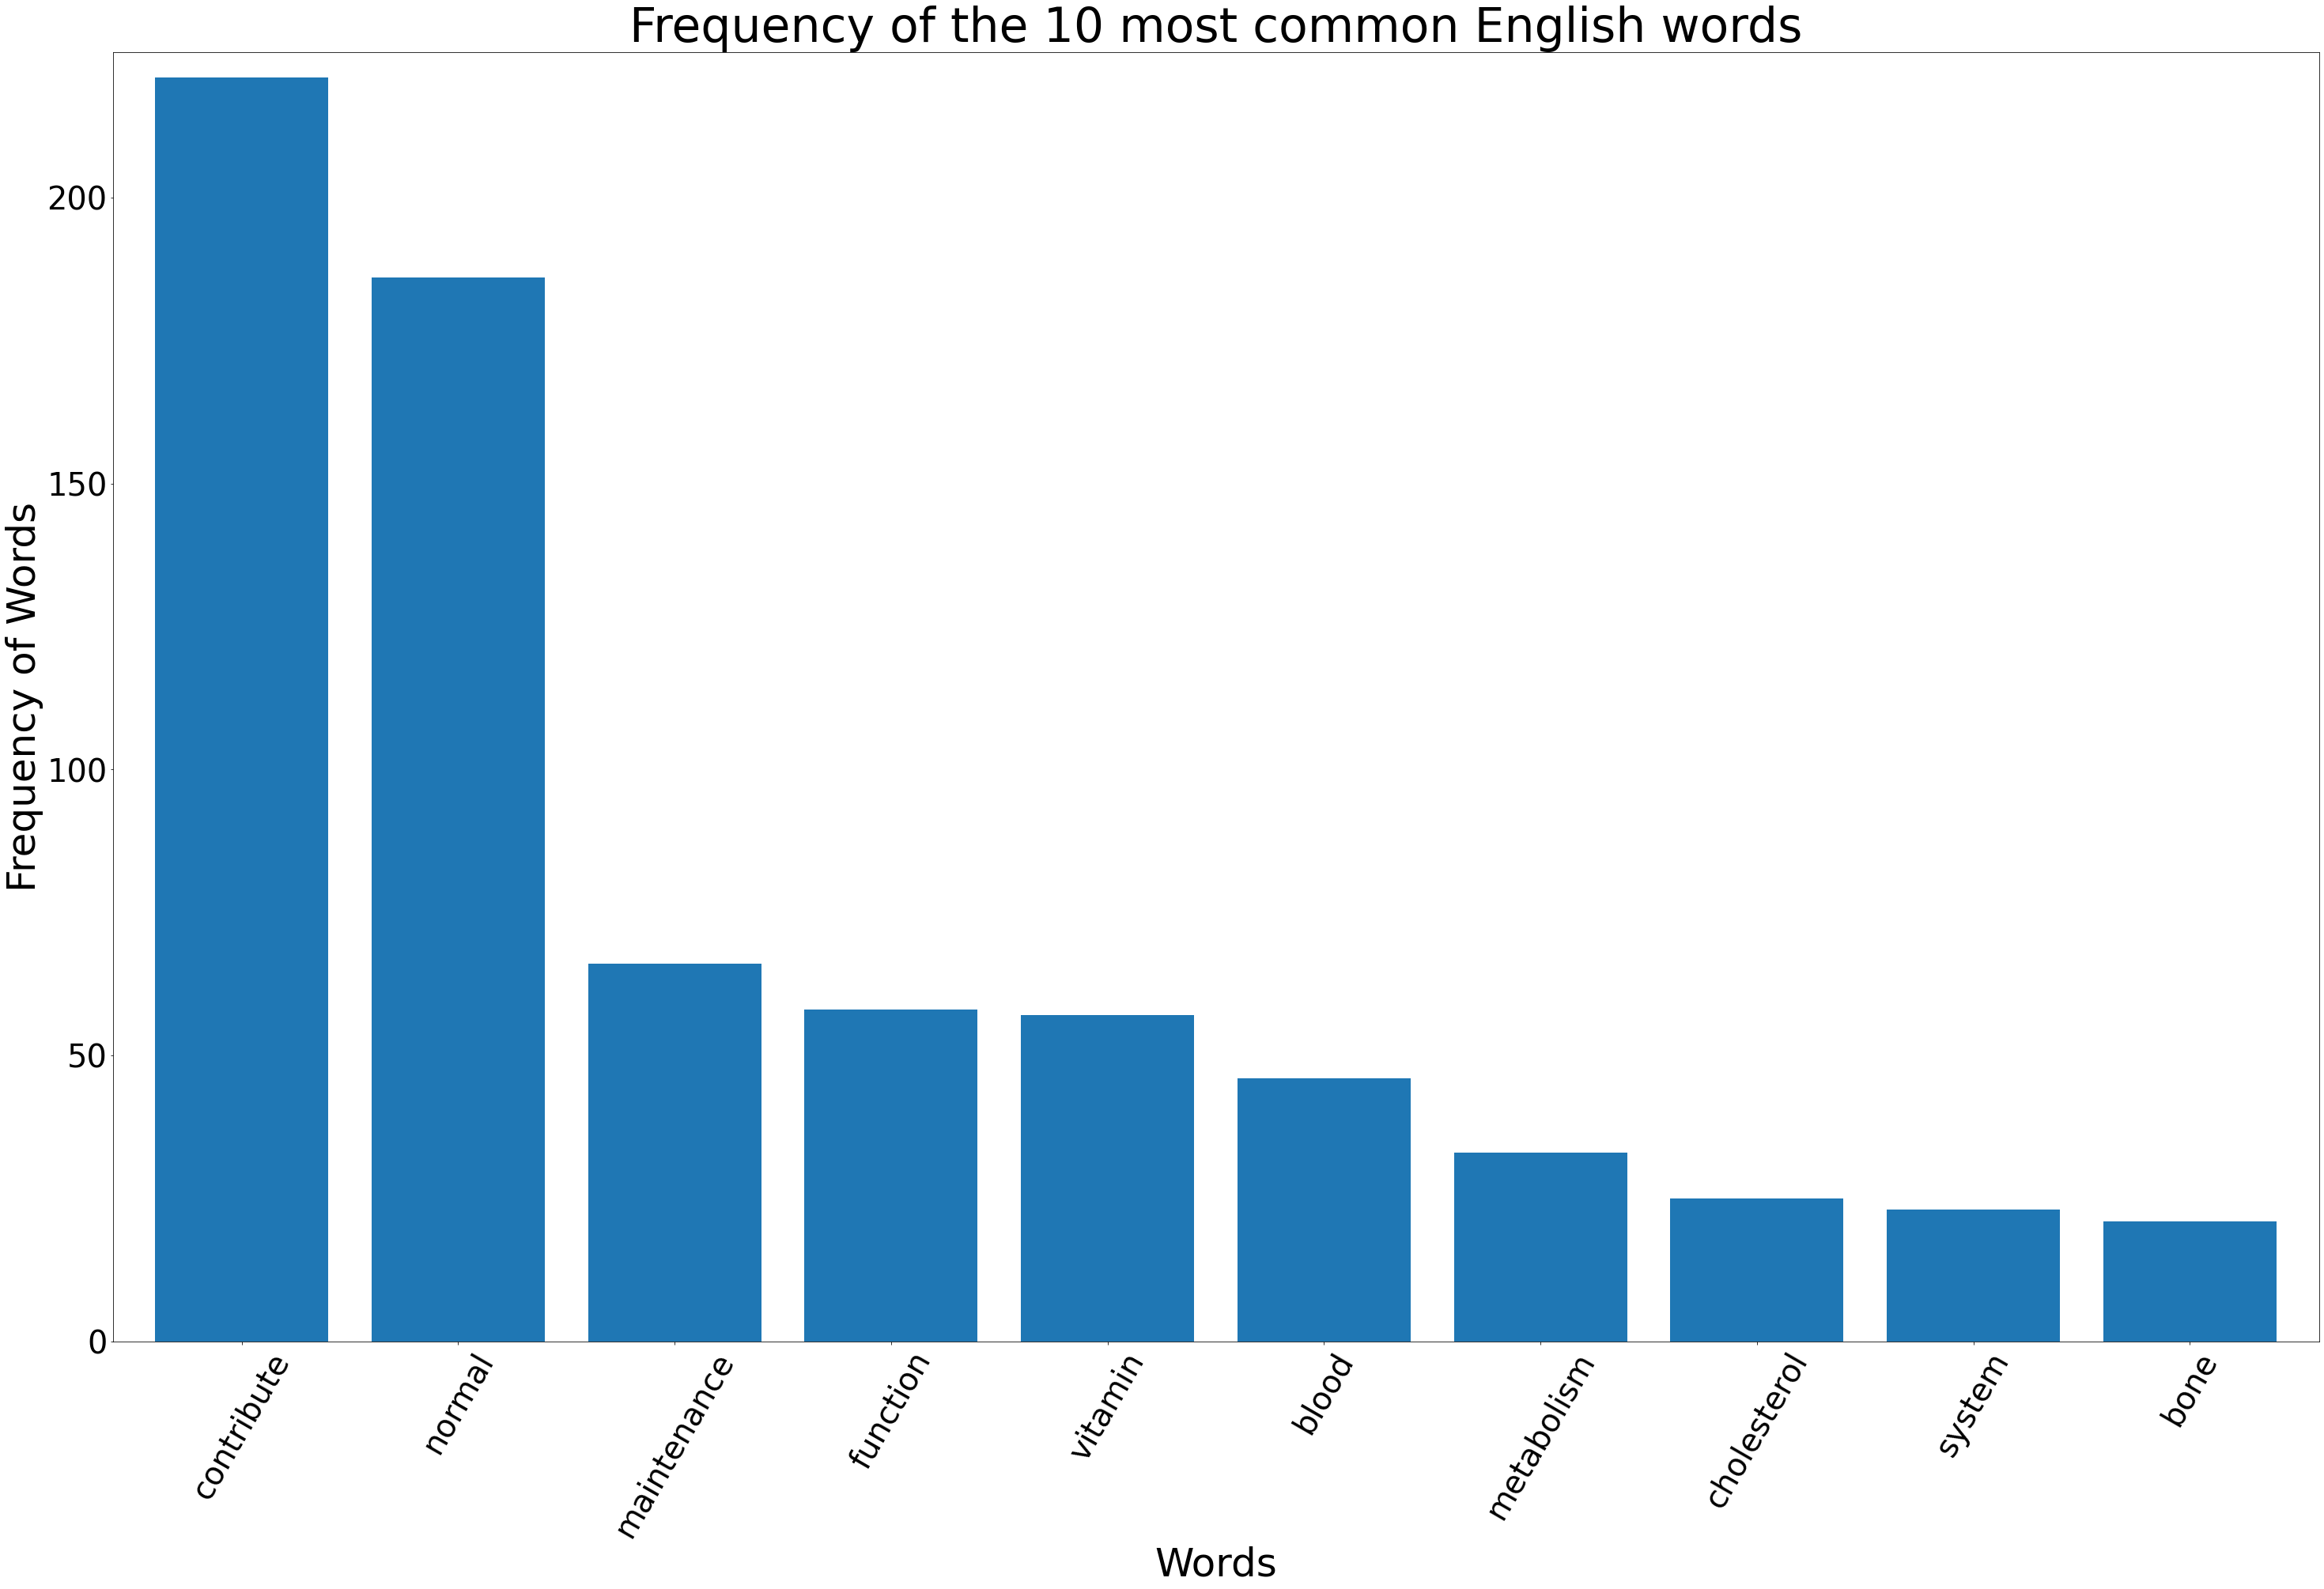

In [74]:
mostcommon_word = Counter(en_allwords).most_common(10)
x, y = zip(*mostcommon_word)

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of the 10 most common English words', fontsize=60)
plt.show()

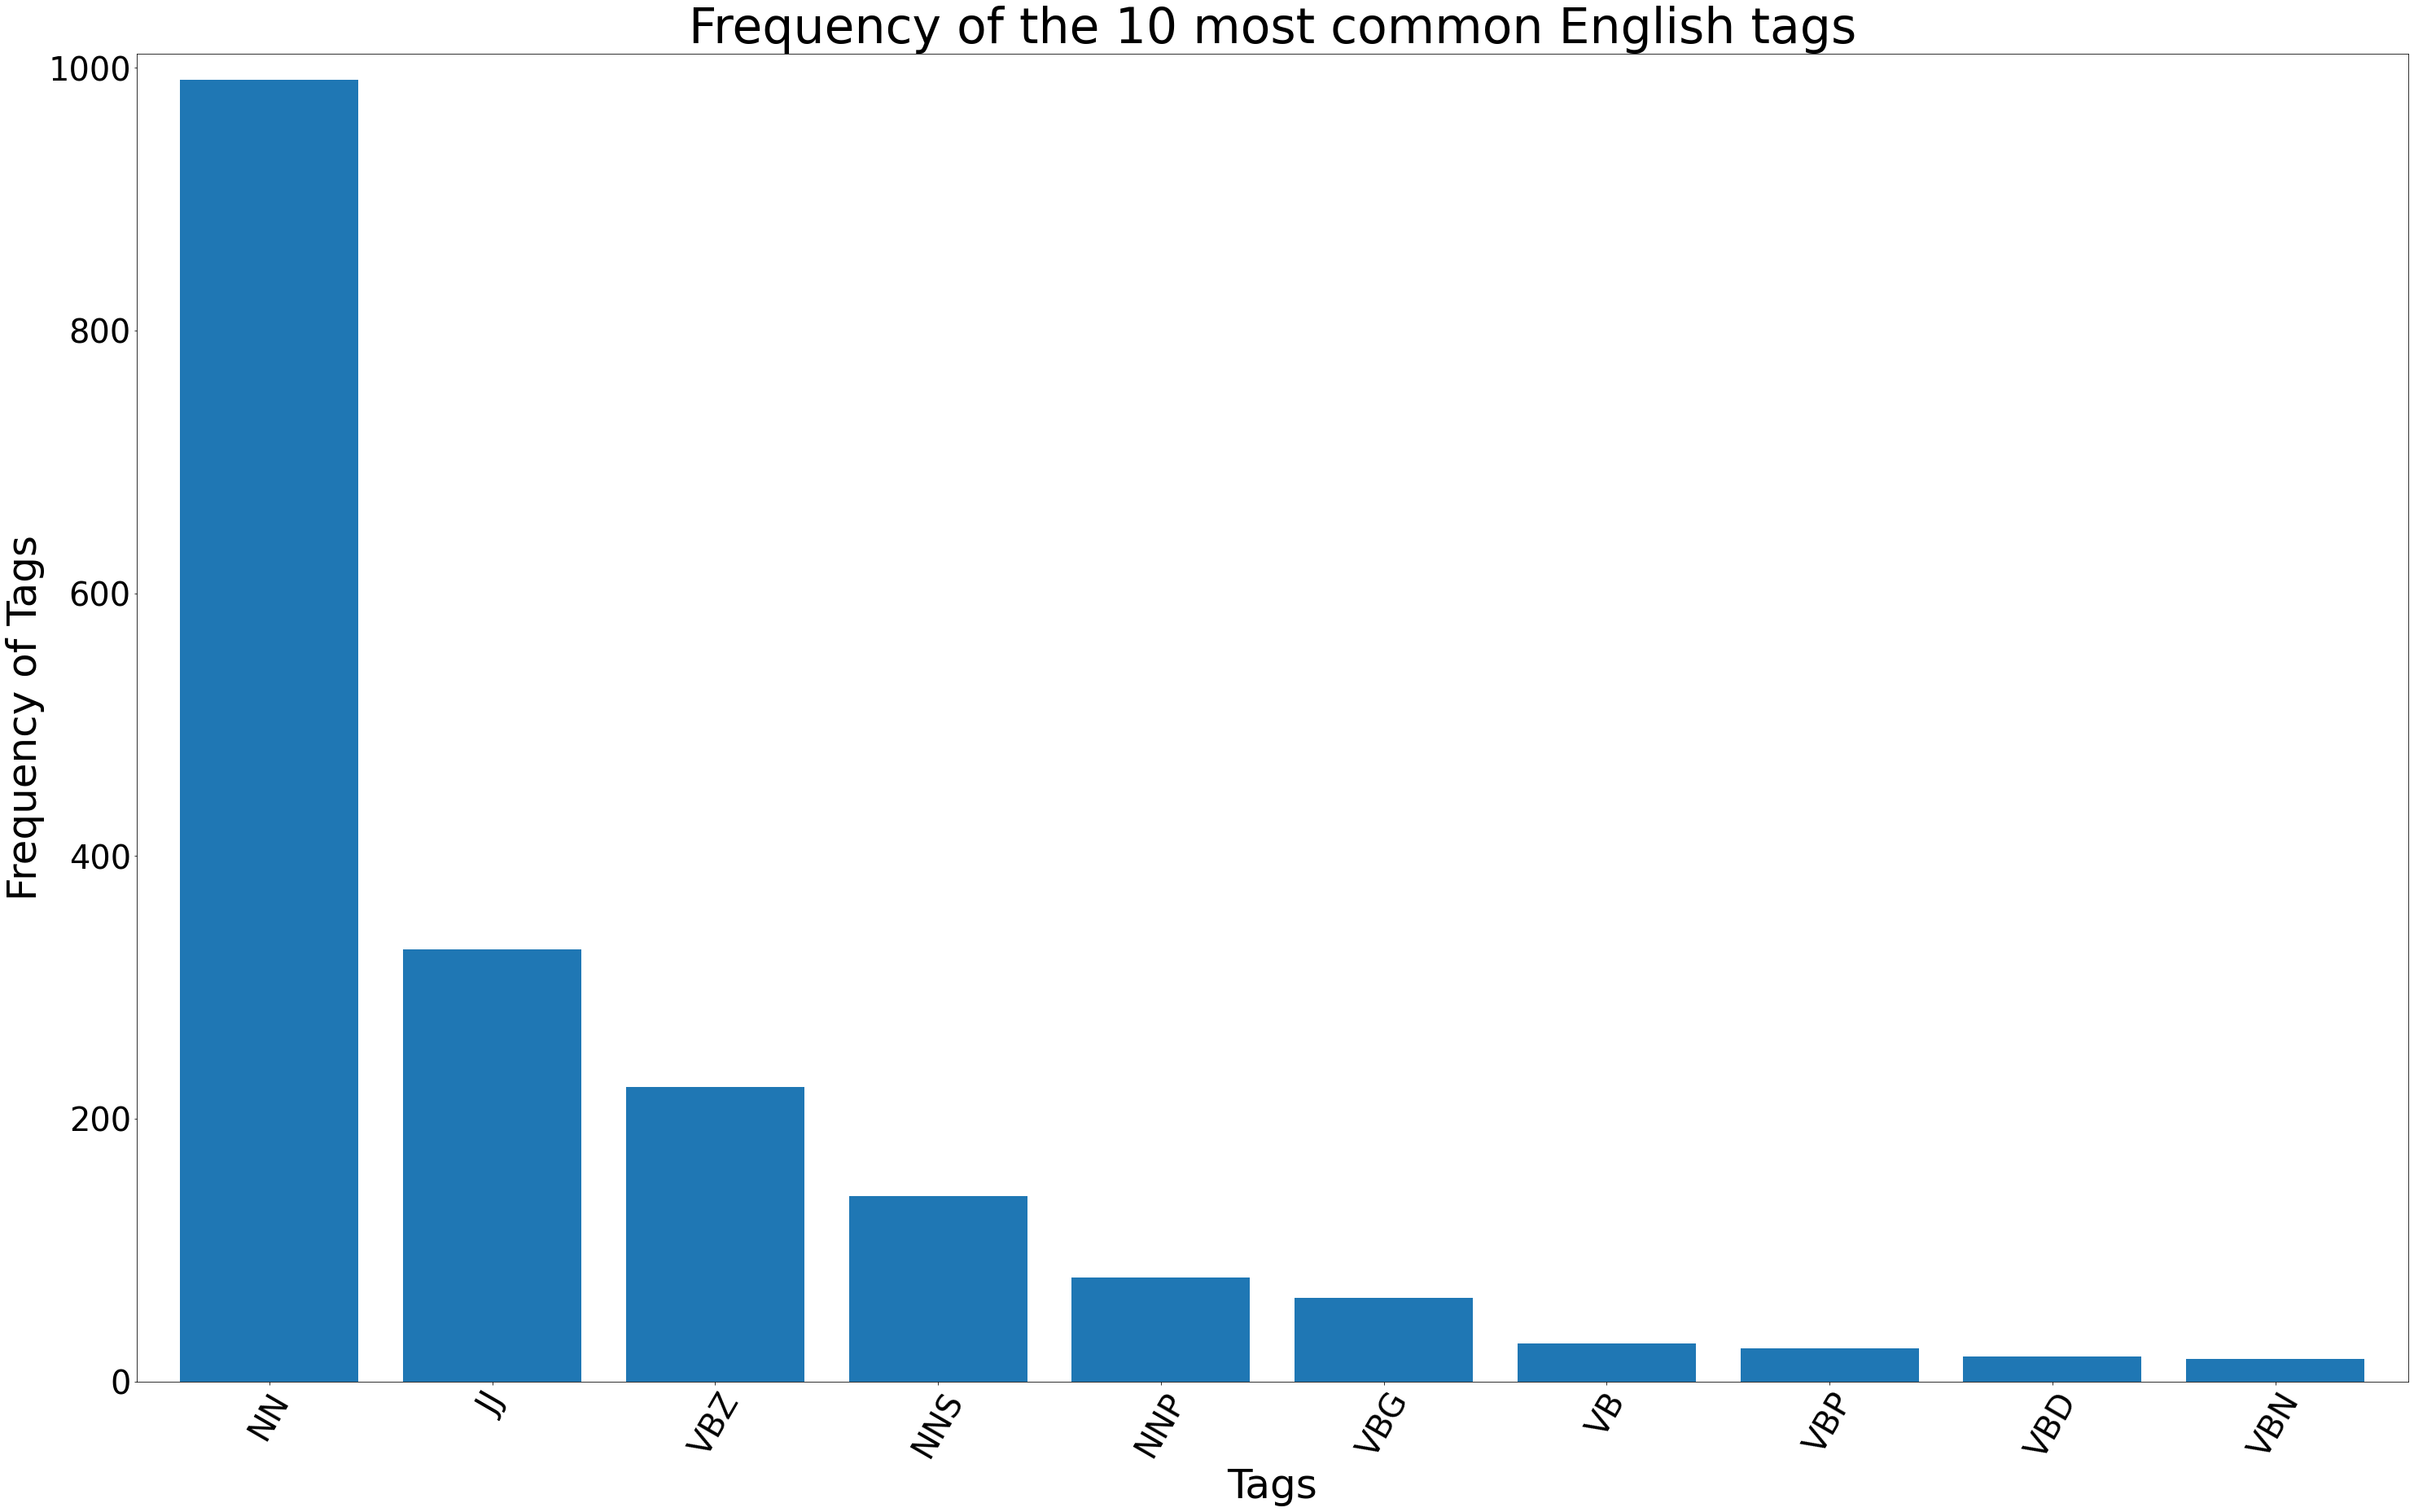

In [75]:
mostcommon_tag = Counter(en_alltags).most_common(10)
x, y = zip(*mostcommon_tag)

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Tags', fontsize=50)
plt.ylabel('Frequency of Tags', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of the 10 most common English tags', fontsize=60)
plt.show()

### French

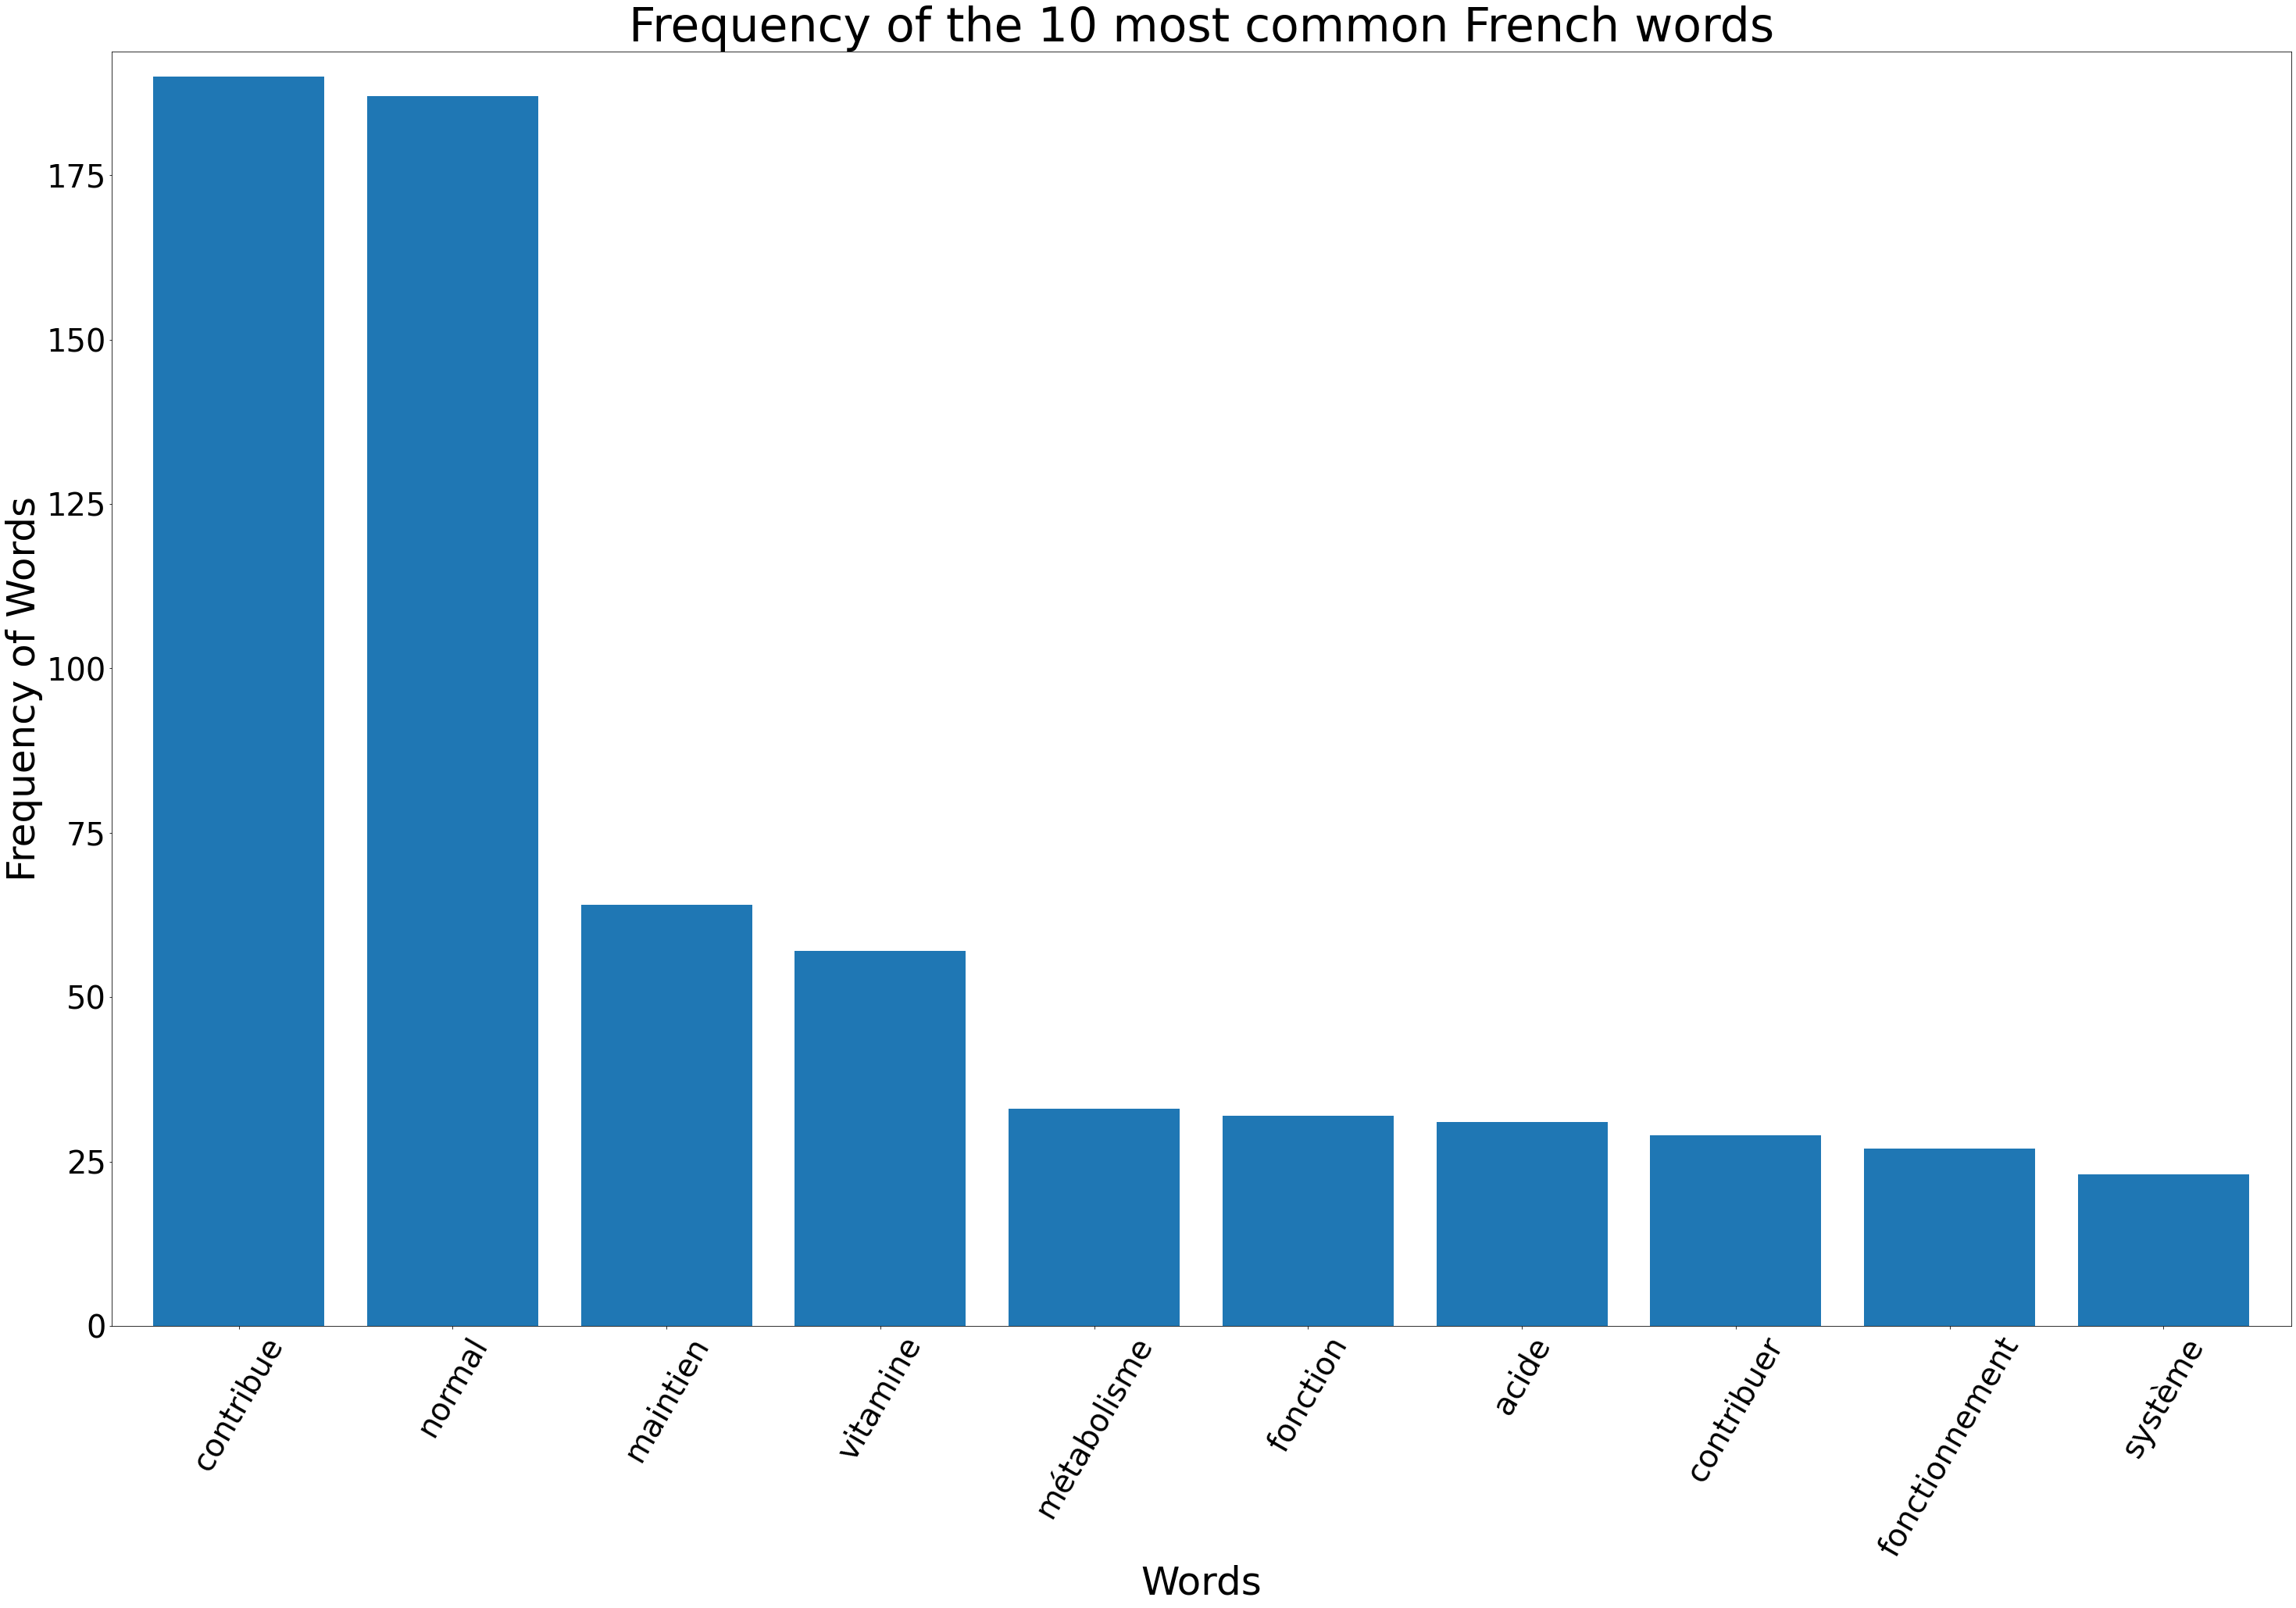

In [80]:
mostcommon_word = Counter(fr_allwords).most_common(10)

x, y = zip(*mostcommon_word)

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of the 10 most common French words', fontsize=60)
plt.show()

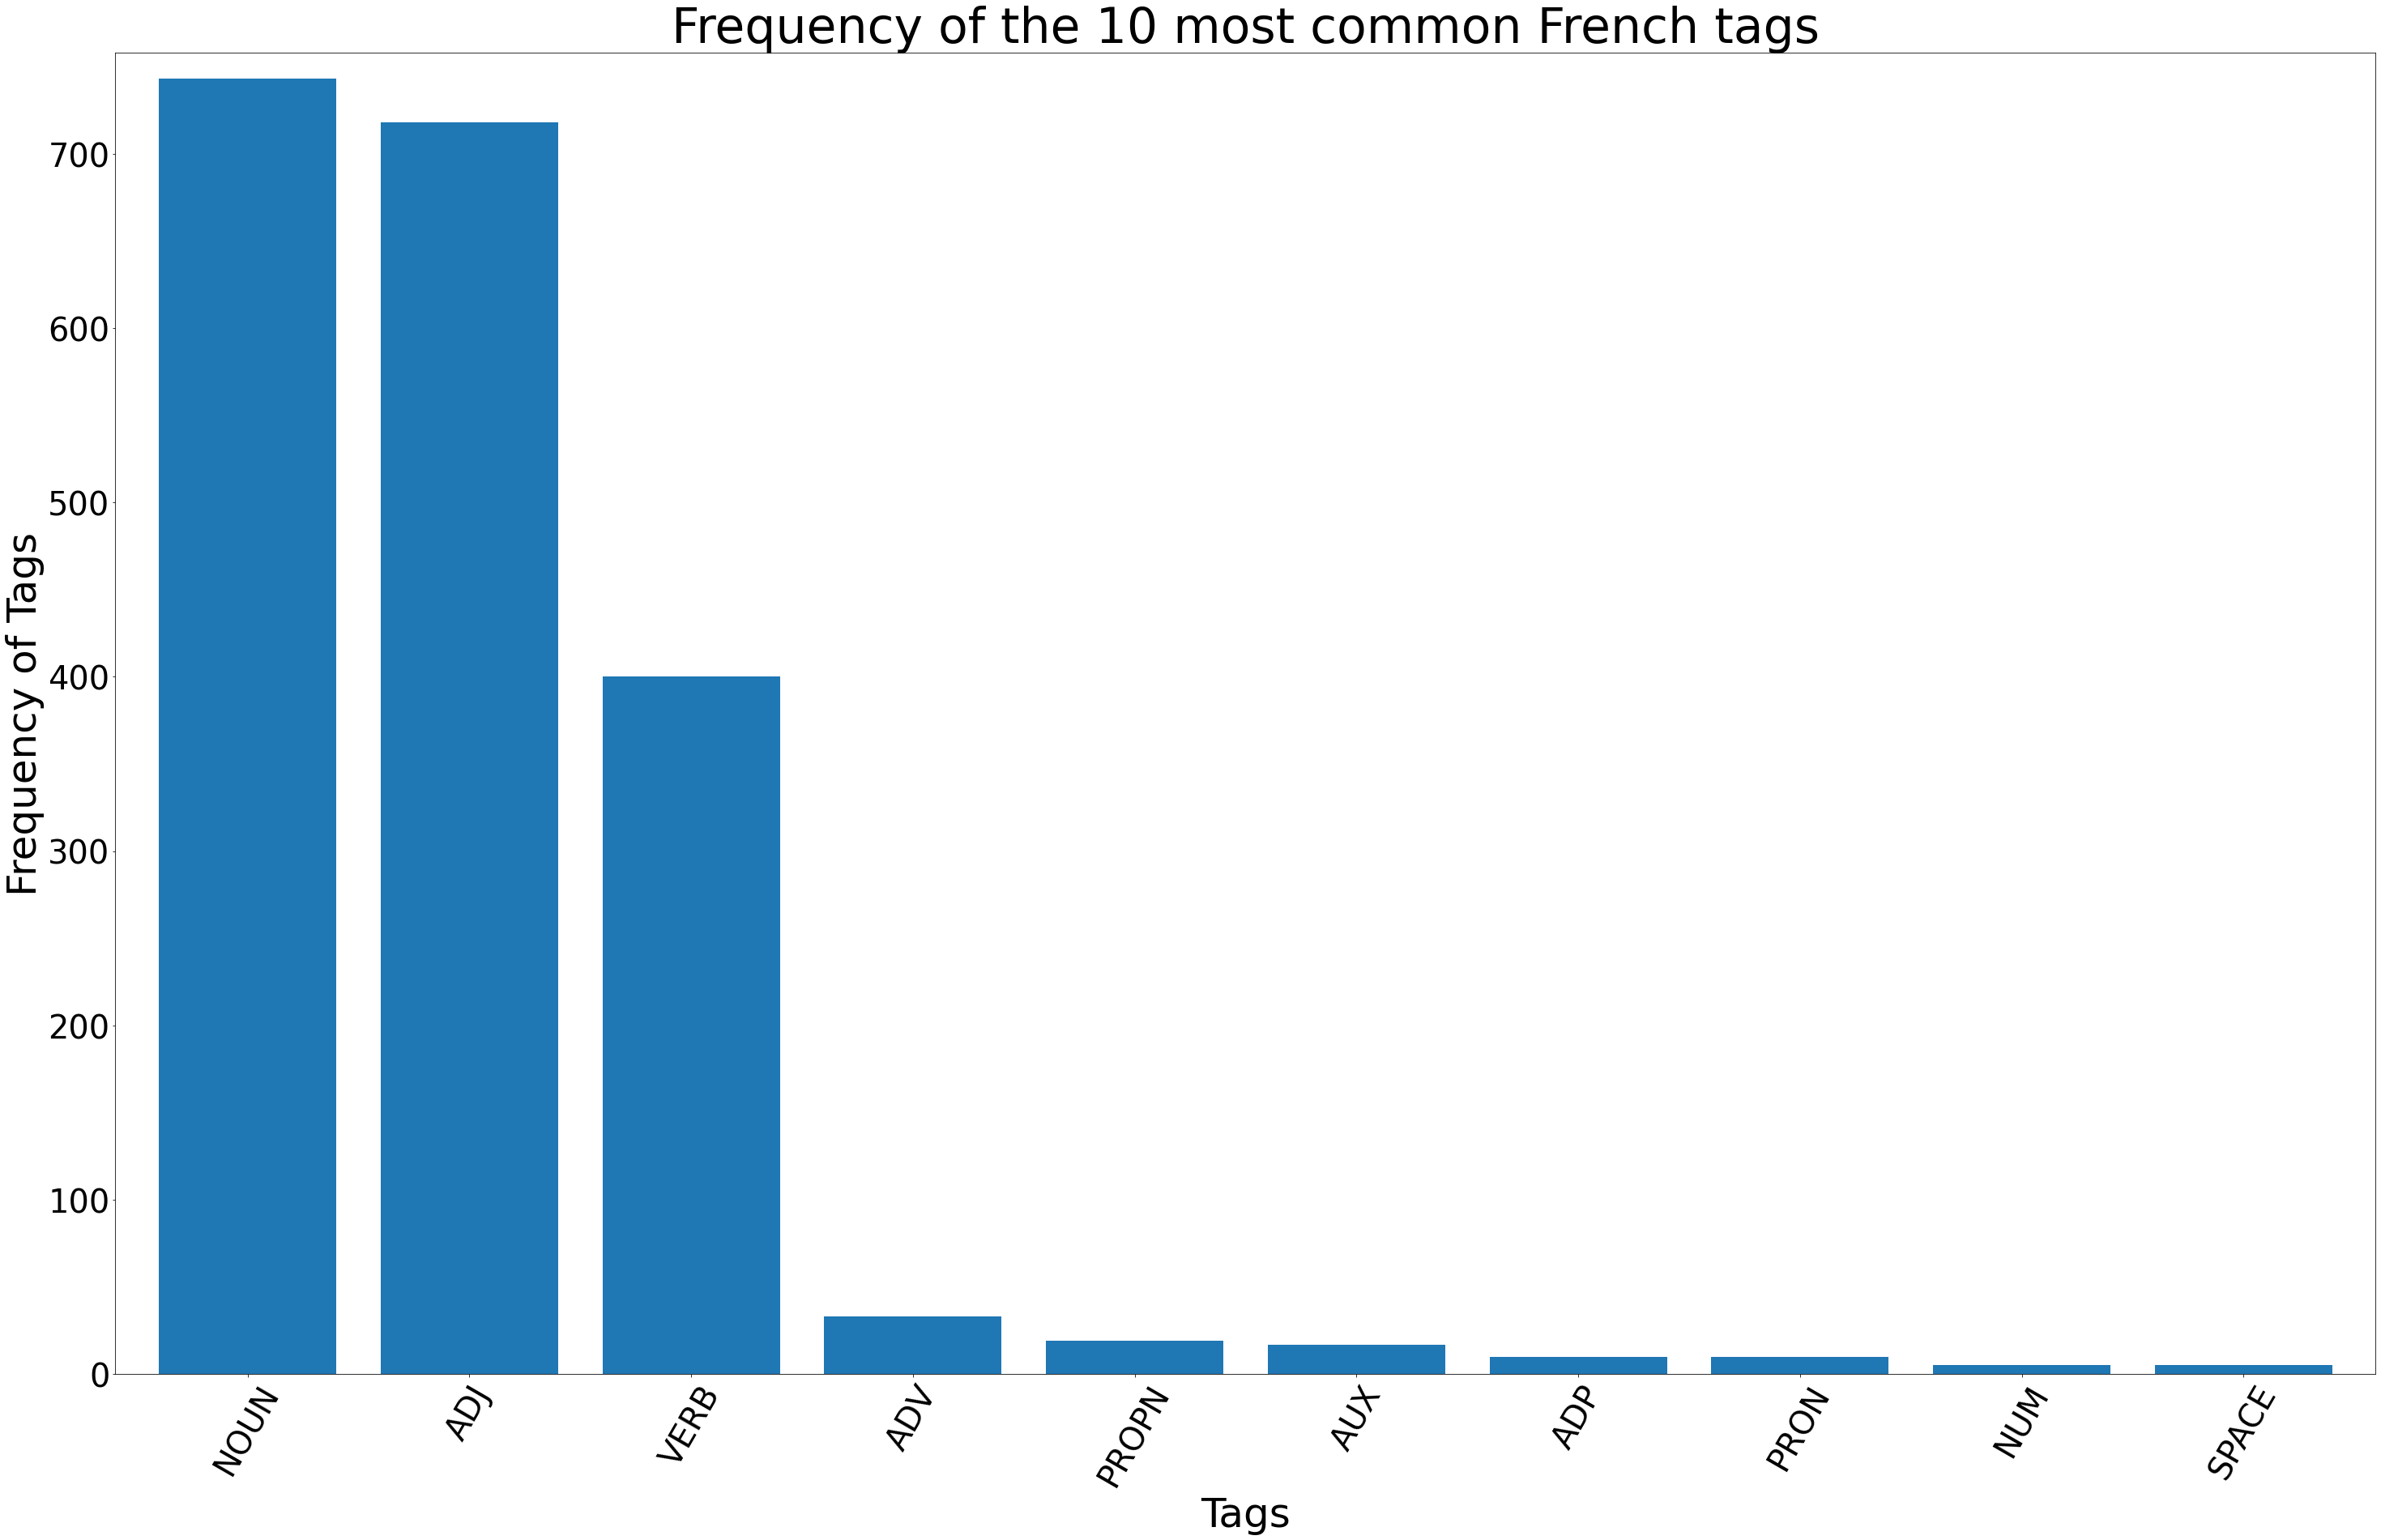

In [83]:
mostcommon_tag = Counter(fr_alltags).most_common(10)
x, y = zip(*mostcommon_tag)

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Tags', fontsize=50)
plt.ylabel('Frequency of Tags', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of the 10 most common French tags', fontsize=60)
plt.show()

In [110]:
fr_df['Claims'][34]

'Il a été démontré que les chewing-gums édulcorés avec 100\xa0% de xylitol réduisaient la plaque dentaire. La plaque dentaire constitue un facteur de risque impliqué dans le développement de la carie chez les enfants'

### German

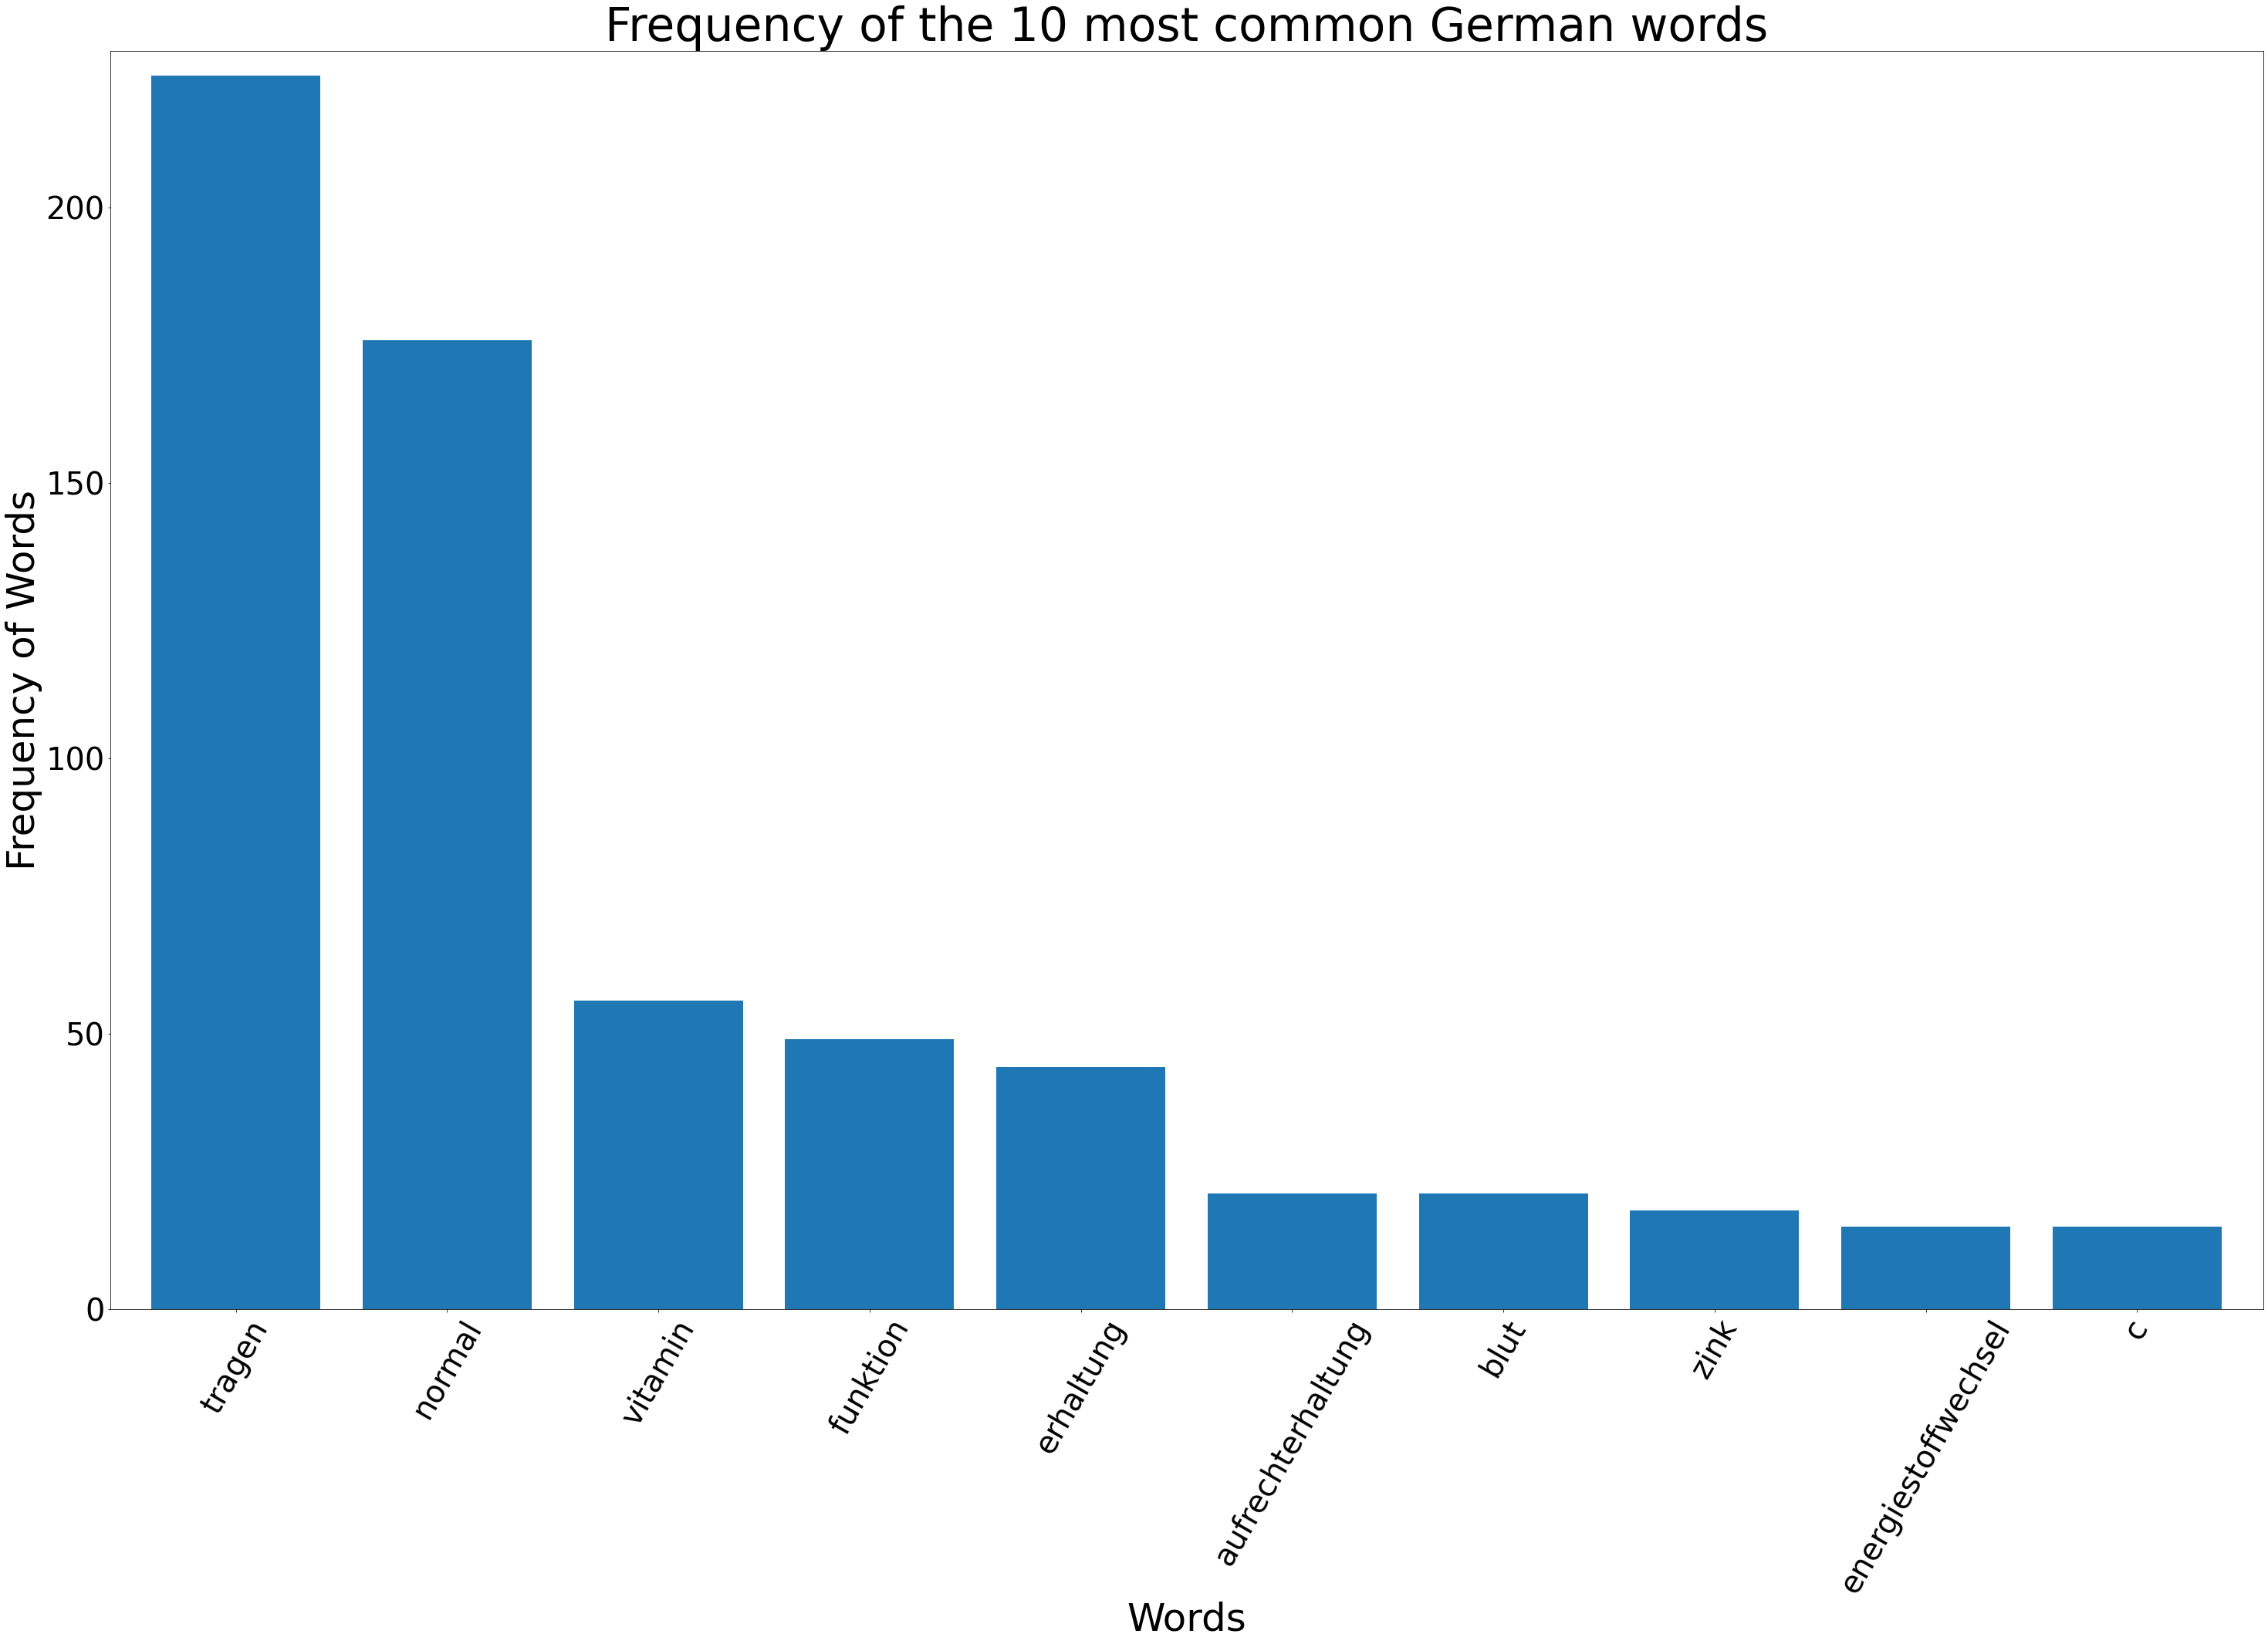

In [84]:
mostcommon_word = Counter(de_allwords).most_common(10)

x, y = zip(*mostcommon_word)

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of the 10 most common German words', fontsize=60)
plt.show()

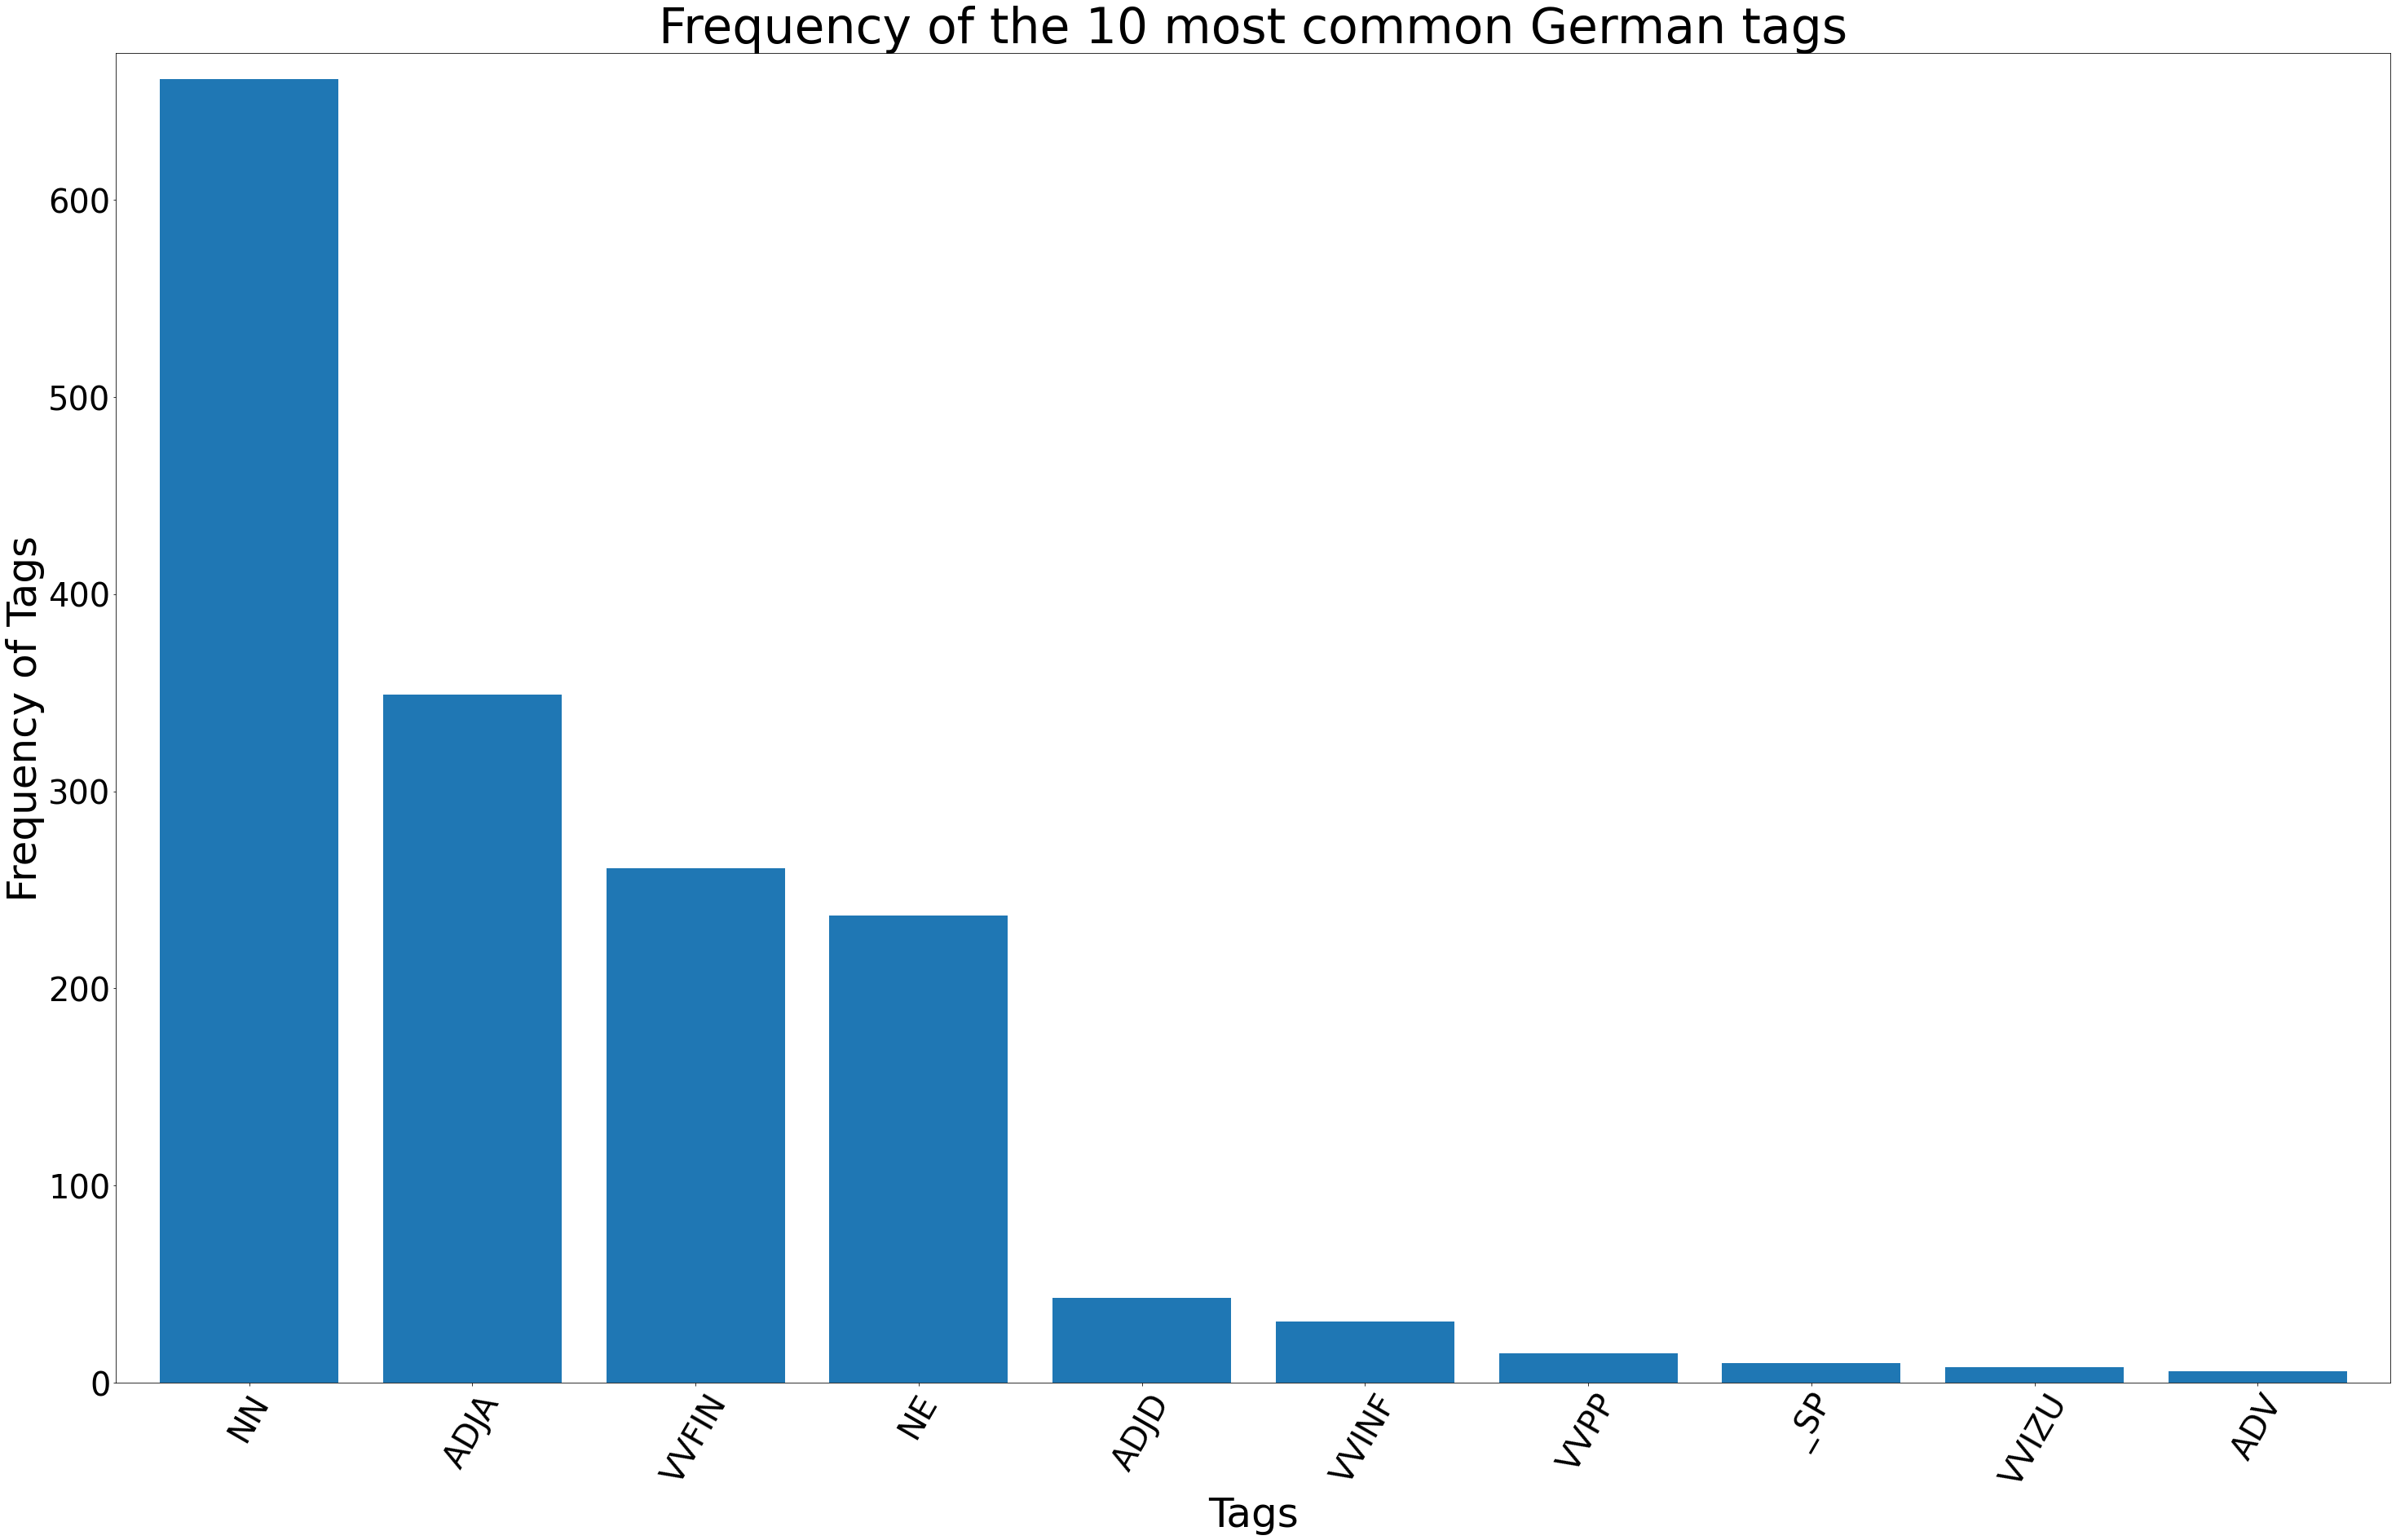

In [85]:
mostcommon_tag = Counter(de_alltags).most_common(10)
x, y = zip(*mostcommon_tag)

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Tags', fontsize=50)
plt.ylabel('Frequency of Tags', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of the 10 most common German tags', fontsize=60)
plt.show()

### Dependency Parsing

In [91]:
print(en_df['Claims'][1])
displacy.render(nlp_en(en_df['Claims'][1]),style='dep',jupyter=True)

Activated charcoal contributes to reducing excessive flatulence after eating


In [92]:
print(fr_df['Claims'][1])
displacy.render(nlp_fr(fr_df['Claims'][1]),style='dep',jupyter=True)

Le charbon actif contribue à réduire l’excès de flatulence après le repas


In [93]:
print(de_df['Claims'][1])
displacy.render(nlp_de(de_df['Claims'][1]),style='dep',jupyter=True)

Aktivkohle trägt zur Verringerung übermäßiger Blähungen nach dem Essen bei
